# Ödev 1

# 1. CR (Computed Radiography) - CR-MONO1-10-chest Görüntüsü

**Önemli Açıklama:** Anaconda -Jupiter Notebook üzerinde bazı kütüphanelerin kurulumlarını yapamadığım için çalışma Google Colab üzerinde yapılmıştır.

In [1]:
!pip install pydicom  ## Çalışma ortamında ilgili kütüphane varsa kurulum atlanmalıdır.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.8 MB/s 


In [2]:
import pydicom as dicom
import pydicom.uid
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL 
from PIL import ImageEnhance
import cv2
from matplotlib import figure

## 1.a Dosyanın içeriğini okuma ve boyutlarını yazdırma:

In [3]:
from google.colab import files            #Jupiter Notebook üzerinde çalışılırken bu script atlanmalıdır.
uploaded = files.upload()

Saving CR-MONO1-10-chest.dcm to CR-MONO1-10-chest.dcm


In [4]:
image=pydicom.dcmread( r'CR-MONO1-10-chest.dcm',force=True)                # Tırnak içine ilgili görüntü dosyasının olduğu path'i giriniz.
image.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian 
image.pixel_array

array([[  0, 209, 782, ..., 121,   0,   0],
       [291, 904, 958, ..., 875, 195,   0],
       [891, 957, 962, ..., 964, 883, 250],
       ...,
       [913, 928, 928, ..., 946, 941, 890],
       [357, 886, 926, ..., 944, 854, 188],
       [  0, 281, 890, ..., 924, 263,   0]], dtype=uint16)

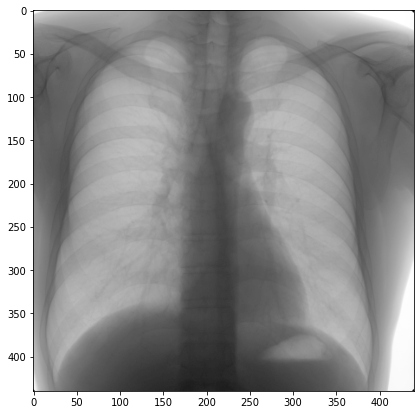

In [5]:
chest=image.pixel_array
plt.figure( figsize=(7,7))
plt.imshow(chest, cmap=plt.cm.gray)


In [6]:
print("image size: ", chest.shape)

image size:  (440, 440)


## 1.b. Görüntü piksellerinin min ve max değerleri:

In [7]:
print("pixel min value:", chest.min().astype(float))
print("pixel max value:", chest.max().astype(float))

pixel min value: 0.0
pixel max value: 979.0


In [8]:
scale = chest.astype(float)
scaled = (np.maximum(scale,0) / scale.max()) * 255.0
scaled = np.uint8(scaled)
print("pixel min value::", scaled.min().astype(float))
print("pixel max value:", scaled.max().astype(float))

pixel min value:: 0.0
pixel max value: 255.0


##1.c.  Görüntünün pixel dağılımı:

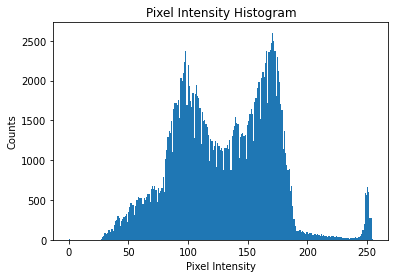

In [9]:
plt.hist(x=scaled.ravel(), bins=256, range=[0, 255])
plt.title("Pixel Intensity Histogram")
plt.ylabel("Counts")
plt.xlabel("Pixel Intensity")
plt.show()

## 1.d. Görüntünün kontrastını artırma:

Text(0.5, 1.0, 'Contrast Enhancement')

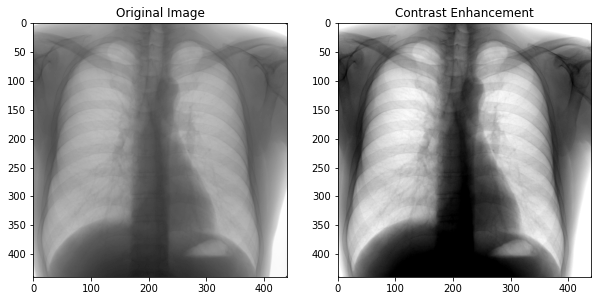

In [10]:
contrast = PIL.Image.fromarray(scaled) 
curr_con = ImageEnhance.Contrast(contrast)
new_con = 2

contrasted = curr_con.enhance(new_con)
contrasted  = np.array(contrasted)

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(scaled, cmap=plt.cm.gray)
ax[0].set_title("Original Image")

ax[1].imshow(contrasted, cmap=plt.cm.gray)
ax[1].set_title("Contrast Enhancement")

## 1.e. Kontrastı artırılmış görüntünün pixel dağılımı:

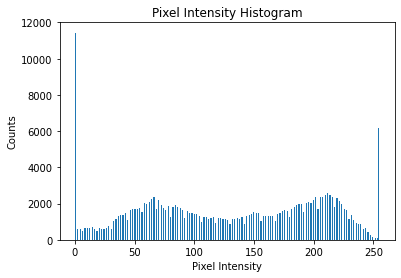

In [11]:
plt.hist(x=contrasted.ravel(), bins=256, range=[0, 255])
plt.title("Pixel Intensity Histogram")
plt.ylabel("Counts")
plt.xlabel("Pixel Intensity")
plt.show()

## 1.f. DICOM dosyasında saklanan tüm metadatayı yazdırma:

In [12]:
image.file_meta

(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian

In [13]:
print(image)

Dataset.file_meta -------------------------------
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
-------------------------------------------------
(0008, 0000) Group Length                        UL: 286
(0008, 0008) Image Type                          CS: 'ORIGINAL PRIMARY'
(0008, 0012) Instance Creation Date              DA: '1995.07.20'
(0008, 0013) Instance Creation Time              TM: '11:22:07'
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9125.0.19950720112207
(0008, 0022) Acquisition Date                    DA: '1993.02.24'
(0008, 0032) Acquisition Time                    TM: '17:58:00'
(0008, 0050) Accession Number                    SH: 'FUJI95714'
(0008, 0060) Modality                            CS: 'CR'
(0008, 0070) Manufacturer                        LO: 'FUJI PHOTO FILM CO. LTD.'
(0008, 0080) Institution Name                    LO

## 1.g. Gauss Yumuşatma Filtresi uygulama:

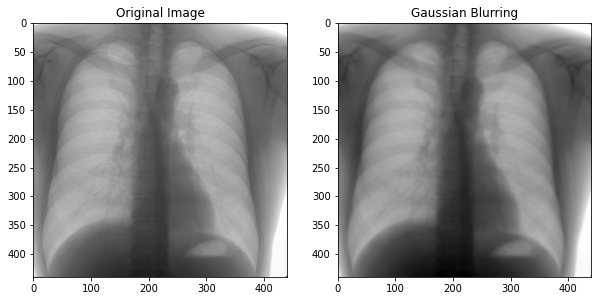

In [14]:
blurred = cv2.GaussianBlur(scaled,(5,5),7) #  5x5 Gaussian kernel ve standart sapma 7

fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(scaled, cmap=plt.cm.gray)
ax[0].set_title("Original Image")

ax[1].imshow(blurred, cmap=plt.cm.gray)
ax[1].set_title("Gaussian Blurring")

plt.show()

## 1.h. Binary Görüntüye Çevirme (Ciğerler Siyah):

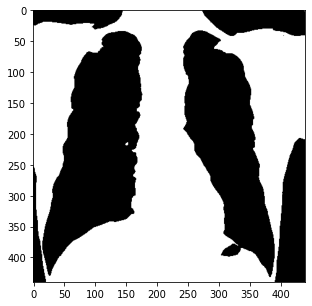

In [15]:
ret,thresh_img = cv2.threshold(blurred,138,255,cv2.THRESH_BINARY_INV)  
plt.figure(figsize=(5,5))
plt.imshow(thresh_img, cmap=plt.cm.gray)

## 1.h. Binary Görüntüye Çevirme (Ciğerler Beyaz):

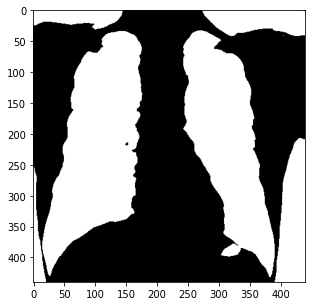

In [16]:
ret,thresh_img = cv2.threshold(blurred,138,255, cv2.THRESH_BINARY)
plt.figure(figsize=(5,5))
plt.imshow(thresh_img, cmap=plt.cm.gray)

## 1.j. Morfolojik işlemler:

In [17]:
img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

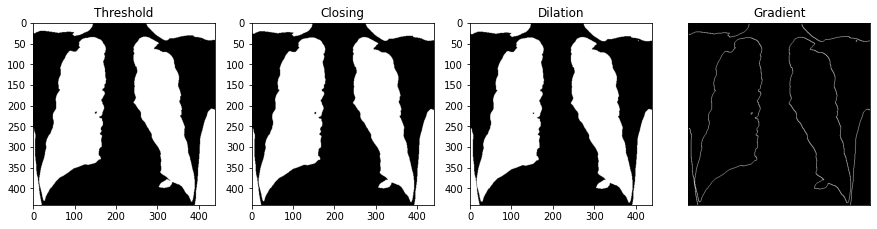

In [18]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT,(2,2)), iterations=1)  
dilation = cv2.dilate(closing, cv2.getStructuringElement(cv2.MORPH_RECT, (2,2)),iterations=1) 
gradient= cv2.morphologyEx(dilation, cv2.MORPH_GRADIENT,cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2)), iterations=1) 
_ ,axs = plt.subplots(1,4,figsize=(15,15))
axs[0].imshow(img)
axs[0].set_title("Threshold")
plt.xticks([]), plt.yticks([])
axs[1].imshow(closing)
axs[1].set_title("Closing")
plt.xticks([]), plt.yticks([])
axs[2].imshow(dilation)
axs[2].set_title("Dilation")
plt.xticks([]), plt.yticks([])
axs[3].imshow(gradient)
axs[3].set_title("Gradient")
plt.xticks([]), plt.yticks([])

In [19]:
cv2.imwrite('\Desktop\BM5371_odev1\dilation.jpeg', dilation)

True

## 1.k. Overlay işlemi:

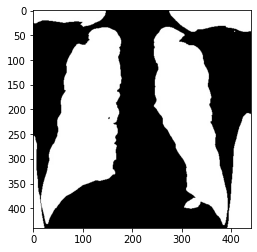

In [20]:
maske=cv2.imread("\Desktop\BM5371_odev1\dilation.jpeg")
plt.imshow(maske)

In [22]:
original_image = cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB)

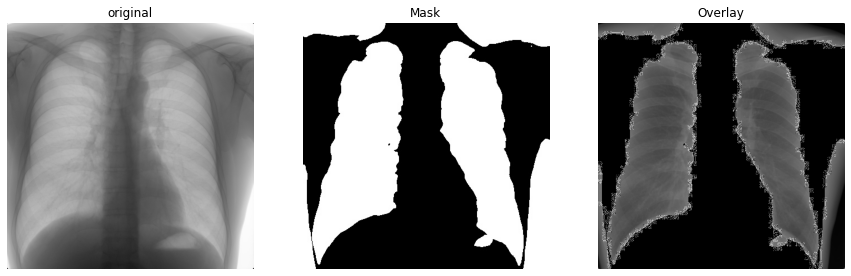

In [42]:
fig, ax = plt.subplots(1, 3, figsize=[15,15])
ax[0].set_title("original")
ax[0].imshow(original_image, cmap='gray')
ax[0].axis('off')

ax[1].set_title("Mask")
ax[1].imshow(maske)
ax[1].axis('off')
        
ax[2].set_title("Overlay")
ax[2].imshow(maske*original_image, cmap='gray')
ax[2].axis('off')
        
plt.show()

## **NOT**: 1.l ve 1.m maddeleri yapılamadı.

#2. MRI (Magnetic Resonance Imaging) - MR-MONO2-8-16x-heart Görüntüsü

## 2.a. DICOM dosyasını Okuma ve Boyutlarını yazdırma::

In [25]:
from google.colab import files       #Jupiter Notebook üzerinde çalışılırken bu script atlanmalıdır.
uploaded = files.upload()

Saving MR-MONO2-8-16x-heart.dcm to MR-MONO2-8-16x-heart.dcm


In [26]:
ds=pydicom.dcmread( r'MR-MONO2-8-16x-heart.dcm',force=True)                  # Tırnak içine ilgili görüntü dosyasının olduğu path'i giriniz.
ds.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian  

In [27]:
original= ds.pixel_array

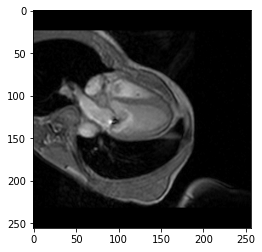

In [28]:
plt.imshow(ds.pixel_array[0], cmap=plt.cm.gray)

In [29]:
print("image size: ", original.shape)

image size:  (16, 256, 256)


## 2.b. DICOM dosyasında saklanan tüm metadata:

In [30]:
ds.file_meta

(0002, 0000) File Meta Information Group Length  UL: 132
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 999.999.2.19960619.163000.1.103
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 999.999

In [31]:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 132
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 999.999.2.19960619.163000.1.103
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 999.999
-------------------------------------------------
(0008, 0000) Group Length                        UL: 248
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 999.999.2.19960619.163000.1.103
(0008, 0020) Study Date                          DA: '1995.06.26'
(0008, 0023) Content Date                        DA: '1995.06.26'
(0008, 0030) Study Time                          TM: '11:20:00

## 2.c. Dosyada saklanan görüntüden alınan her bir kesiti beraber gösterme:

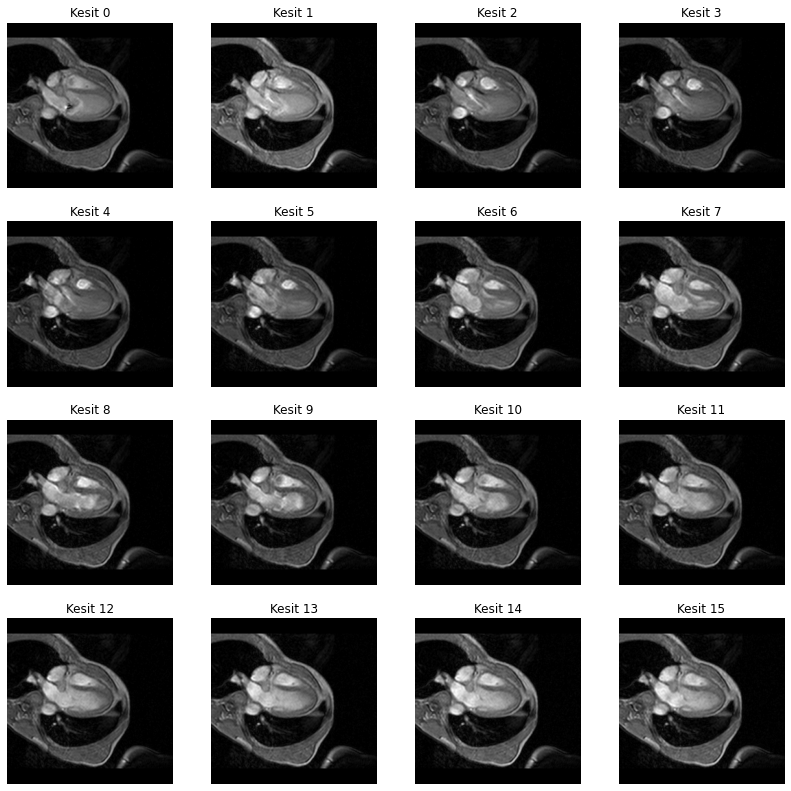

In [34]:
def kesit(kesit, rows=4, cols=4, start_with=0, show_every=1):
    fig,ax = plt.subplots(rows,cols,figsize=[14,14])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('Kesit %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(kesit[ind],cmap=plt.cm.gray)
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

kesit(original)

## 2.d. Axial görünümde herhangi bir kesit alma:

Text(0.5, 1.0, 'Axial')

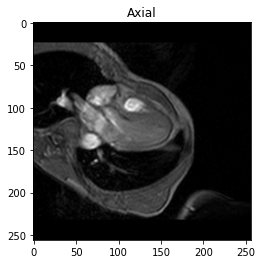

In [36]:
axial = original[4,:,:]
plt.imshow(axial, cmap=plt.cm.gray)
plt.title('Axial')

## 2.e. Sagittal görünümde herhangi bir kesit alma:

Text(0.5, 1.0, 'Saggital')

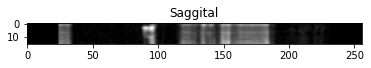

In [38]:
saggital = original[:,:,30]
plt.imshow(saggital, cmap=plt.cm.gray)
plt.title('Saggital')

## 2.f. Coronal görünümde herhangi bir kesit alma:

Text(0.5, 1.0, 'Coronal')

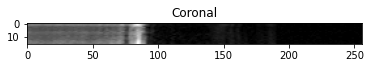

In [41]:
coronal = original[:,30,:]
plt.imshow(coronal, cmap=plt.cm.gray)
plt.title('Coronal')